# Regresi indeks kemiskinan pada perkotaan dan perdesaan di Maluku berdasarkan korelasi dengan dua provinsi di Indonesia



In [ ]:
# Import libraries yang dibutuhkan
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import dataset dan melihat 10 baris pertama
df = pd.read_csv('/content/IndeksKeparahanKemiskinan1.csv')
df.head(10) 

,Provinsi,Tahunan 2007,Tahunan 2008,Tahunan 2009,Tahunan 2010,Tahunan 2011,Semester 1 2012,Semester 2 2012,Semester 1 2013,Semester 2 2013,...,Semester 2 2018.1,Semester 1 2019,Semester 2 2019,Semester 1 2020,Semester 2 2020,Semester 1 2021,Semester 2 2021,Semester 1 2022,Semester 2 2022,Unnamed: 28
0,ACEH,1.64,1.50,1.34,1.26,0.94,0.99,0.83,0.85,0.83,...,0.72,0.66,0.67,0.71,0.83,0.75,0.81,0.61,0.78,NaN
1,SUMATERA UTARA,0.55,0.58,0.50,0.57,0.51,0.34,0.50,0.37,0.46,...,0.33,0.31,0.37,0.39,0.45,0.38,0.38,0.34,0.34,NaN
2,SUMATERA BARAT,0.44,0.39,0.32,0.35,0.35,0.29,0.31,0.21,0.30,...,0.21,0.21,0.15,0.20,0.26,0.24,0.23,0.16,0.17,NaN
3,RIAU,0.68,0.40,0.25,0.37,0.29,0.28,0.25,0.30,0.24,...,0.24,0.27,0.25,0.28,0.43,0.24,0.28,0.27,0.19,NaN
4,JAMBI,0.54,0.41,0.36,0.23,0.18,0.29,0.44,0.19,0.26,...,0.31,0.30,0.26,0.25,0.27,0.30,0.23,0.26,0.24,NaN
5,SUMATERA SELATAN,1.14,0.85,0.86,0.71,0.69,0.48,0.43,0.46,0.73,...,0.50,0.51,0.52,0.48,0.63,0.54,0.64,0.45,0.39,NaN
6,BENGKULU,1.00,1.07,0.77,0.69,0.62,1.40,0.80,0.74,0.89,...,0.51,0.58,0.45,0.56,0.64,0.62,0.55,0.58,0.47,NaN
7,LAMPUNG,1.07,1.03,1.12,0.72,0.72,0.51,0.62,0.52,0.59,...,0.48,0.44,0.44,0.41,0.57,0.42,0.38,0.41,0.39,NaN
8,KEP. BANGKA BELITUNG,0.47,0.31,0.31,0.23,0.13,0.08,0.14,0.11,0.12,...,0.15,0.10,0.12,0.13,0.17,0.11,0.11,0.13,0.06,NaN
9,KEP. RIAU,0.50,0.72,0.77,0.25,0.35,0.23,0.19,0.15,0.26,...,0.11,0.12,0.18,0.28,0.42,0.28,0.22,0.25,0.19,NaN


# Melakukan transpose

In [ ]:
data = pd.DataFrame(data=df)

In [ ]:
data = data.transpose()

In [ ]:
df2.to_csv('IndeksKeparahanKemisikinan2.csv')

In [ ]:
data = pd.read_csv('IndeksKeparahanKemiskinan2.csv')
data.head(50)

,Provinsi,ACEH,SUMATERA UTARA,SUMATERA BARAT,RIAU,JAMBI,SUMATERA SELATAN,BENGKULU,LAMPUNG,KEP. BANGKA BELITUNG,...,SULAWESI TENGAH,SULAWESI SELATAN,SULAWESI TENGGARA,GORONTALO,SULAWESI BARAT,MALUKU,MALUKU UTARA,PAPUA BARAT,PAPUA,INDONESIA
0,Tahunan 2007,1.64,0.55,0.44,0.68,0.54,1.14,1.00,1.07,0.47,...,1.38,0.68,1.21,1.68,0.57,1.84,0.64,5.66,3.88,0.84
1,Tahunan 2008,1.50,0.58,0.39,0.40,0.41,0.85,1.07,1.03,0.31,...,1.41,0.67,1.08,1.27,0.66,1.75,0.39,3.50,4.01,0.76
2,Tahunan 2009,1.34,0.50,0.32,0.25,0.36,0.86,0.77,1.12,0.31,...,1.37,0.55,0.98,1.27,0.60,1.67,0.36,3.57,2.98,0.68
3,Tahunan 2010,1.26,0.57,0.35,0.37,0.23,0.71,0.69,0.72,0.23,...,0.80,0.49,0.89,1.00,0.35,1.47,0.33,4.30,3.37,0.58
4,Tahunan 2011,0.94,0.51,0.35,0.29,0.18,0.69,0.62,0.72,0.13,...,0.75,0.40,0.69,1.00,0.61,1.54,0.21,3.43,2.81,0.55
5,Semester 1 2012,0.99,0.34,0.29,0.28,0.29,0.48,1.40,0.51,0.08,...,0.66,0.41,0.61,0.71,0.41,1.36,0.36,2.65,2.79,0.47
6,Semester 2 2012,0.83,0.50,0.31,0.25,0.44,0.43,0.80,0.62,0.14,...,0.82,0.42,0.49,0.84,0.40,1.31,0.14,1.71,2.44,0.48
7,Semester 1 2013,0.85,0.37,0.21,0.30,0.19,0.46,0.74,0.52,0.11,...,1.04,0.48,0.56,0.90,0.52,1.16,0.14,2.16,2.21,0.43
8,Semester 2 2013,0.83,0.46,0.30,0.24,0.26,0.73,0.89,0.59,0.12,...,0.53,0.40,0.43,0.85,0.27,0.93,0.16,1.84,2.01,0.48
9,Semester 1 2014,0.72,0.37,0.22,0.21,0.23,0.59,0.70,0.53,0.16,...,0.52,0.37,0.45,0.90,0.25,1.11,0.26,2.05,2.3,0.43


In [ ]:
# Periksa informasi terkait dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Provinsi              27 non-null     object 
 1   ACEH                  27 non-null     float64
 2   SUMATERA UTARA        27 non-null     float64
 3   SUMATERA BARAT        27 non-null     float64
 4   RIAU                  27 non-null     float64
 5   JAMBI                 27 non-null     float64
 6   SUMATERA SELATAN      27 non-null     float64
 7   BENGKULU              27 non-null     float64
 8   LAMPUNG               27 non-null     float64
 9   KEP. BANGKA BELITUNG  27 non-null     float64
 10  KEP. RIAU             27 non-null     float64
 11  DKI JAKARTA           27 non-null     float64
 12  JAWA BARAT            27 non-null     float64
 13  JAWA TENGAH           27 non-null     float64
 14  DI YOGYAKARTA         27 non-null     float64
 15  JAWA TIMUR            27 

In [ ]:
#Melihat jika ada values yang kosong/missing
data.isnull().sum()

Provinsi                1
ACEH                    1
SUMATERA UTARA          1
SUMATERA BARAT          1
RIAU                    1
JAMBI                   1
SUMATERA SELATAN        1
BENGKULU                1
LAMPUNG                 1
KEP. BANGKA BELITUNG    1
KEP. RIAU               1
DKI JAKARTA             1
JAWA BARAT              1
JAWA TENGAH             1
DI YOGYAKARTA           1
JAWA TIMUR              1
BANTEN                  1
BALI                    1
NUSA TENGGARA BARAT     1
NUSA TENGGARA TIMUR     1
KALIMANTAN BARAT        1
KALIMANTAN TENGAH       1
KALIMANTAN SELATAN      1
KALIMANTAN TIMUR        1
KALIMANTAN UTARA        1
SULAWESI UTARA          1
SULAWESI TENGAH         1
SULAWESI SELATAN        1
SULAWESI TENGGARA       1
GORONTALO               1
SULAWESI BARAT          1
MALUKU                  1
MALUKU UTARA            1
PAPUA BARAT             1
PAPUA                   0
INDONESIA               1
dtype: int64

In [ ]:
# Menghapus values yang kosong/missing yaitu terdapat dalam satu baris
data.dropna(0, inplace=True)

<ipython-input-4-48396248eb63>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  data.dropna(0, inplace=True)


In [ ]:
# Cek ulang
data.isnull().sum()

Provinsi                0
ACEH                    0
SUMATERA UTARA          0
SUMATERA BARAT          0
RIAU                    0
JAMBI                   0
SUMATERA SELATAN        0
BENGKULU                0
LAMPUNG                 0
KEP. BANGKA BELITUNG    0
KEP. RIAU               0
DKI JAKARTA             0
JAWA BARAT              0
JAWA TENGAH             0
DI YOGYAKARTA           0
JAWA TIMUR              0
BANTEN                  0
BALI                    0
NUSA TENGGARA BARAT     0
NUSA TENGGARA TIMUR     0
KALIMANTAN BARAT        0
KALIMANTAN TENGAH       0
KALIMANTAN SELATAN      0
KALIMANTAN TIMUR        0
KALIMANTAN UTARA        0
SULAWESI UTARA          0
SULAWESI TENGAH         0
SULAWESI SELATAN        0
SULAWESI TENGGARA       0
GORONTALO               0
SULAWESI BARAT          0
MALUKU                  0
MALUKU UTARA            0
PAPUA BARAT             0
PAPUA                   0
INDONESIA               0
dtype: int64

In [ ]:
data.head(50)

,Provinsi,ACEH,SUMATERA UTARA,SUMATERA BARAT,RIAU,JAMBI,SUMATERA SELATAN,BENGKULU,LAMPUNG,KEP. BANGKA BELITUNG,...,SULAWESI TENGAH,SULAWESI SELATAN,SULAWESI TENGGARA,GORONTALO,SULAWESI BARAT,MALUKU,MALUKU UTARA,PAPUA BARAT,PAPUA,INDONESIA
0,Tahunan 2007,1.64,0.55,0.44,0.68,0.54,1.14,1.00,1.07,0.47,...,1.38,0.68,1.21,1.68,0.57,1.84,0.64,5.66,3.88,0.84
1,Tahunan 2008,1.50,0.58,0.39,0.40,0.41,0.85,1.07,1.03,0.31,...,1.41,0.67,1.08,1.27,0.66,1.75,0.39,3.50,4.01,0.76
2,Tahunan 2009,1.34,0.50,0.32,0.25,0.36,0.86,0.77,1.12,0.31,...,1.37,0.55,0.98,1.27,0.60,1.67,0.36,3.57,2.98,0.68
3,Tahunan 2010,1.26,0.57,0.35,0.37,0.23,0.71,0.69,0.72,0.23,...,0.80,0.49,0.89,1.00,0.35,1.47,0.33,4.30,3.37,0.58
4,Tahunan 2011,0.94,0.51,0.35,0.29,0.18,0.69,0.62,0.72,0.13,...,0.75,0.40,0.69,1.00,0.61,1.54,0.21,3.43,2.81,0.55
5,Semester 1 2012,0.99,0.34,0.29,0.28,0.29,0.48,1.40,0.51,0.08,...,0.66,0.41,0.61,0.71,0.41,1.36,0.36,2.65,2.79,0.47
6,Semester 2 2012,0.83,0.50,0.31,0.25,0.44,0.43,0.80,0.62,0.14,...,0.82,0.42,0.49,0.84,0.40,1.31,0.14,1.71,2.44,0.48
7,Semester 1 2013,0.85,0.37,0.21,0.30,0.19,0.46,0.74,0.52,0.11,...,1.04,0.48,0.56,0.90,0.52,1.16,0.14,2.16,2.21,0.43
8,Semester 2 2013,0.83,0.46,0.30,0.24,0.26,0.73,0.89,0.59,0.12,...,0.53,0.40,0.43,0.85,0.27,0.93,0.16,1.84,2.01,0.48
9,Semester 1 2014,0.72,0.37,0.22,0.21,0.23,0.59,0.70,0.53,0.16,...,0.52,0.37,0.45,0.90,0.25,1.11,0.26,2.05,2.3,0.43


Di sini akan menggunakan kolom **ACEH**, **LAMPUNG**, dan **BANTEN** sebagai variable independen/feature

Kolom **MALUKU** akan digunakan sebagai variable dependen

In [ ]:
# Melihat hubungan linear tiap X dengan Y menggunakan analisis korelasi atau plot
data.corr()

,ACEH,SUMATERA UTARA,SUMATERA BARAT,RIAU,JAMBI,SUMATERA SELATAN,BENGKULU,LAMPUNG,KEP. BANGKA BELITUNG,KEP. RIAU,...,KALIMANTAN TIMUR,SULAWESI UTARA,SULAWESI TENGAH,SULAWESI SELATAN,SULAWESI TENGGARA,GORONTALO,SULAWESI BARAT,MALUKU,MALUKU UTARA,PAPUA BARAT
ACEH,1.000000,0.714996,0.830351,0.629868,0.530432,0.784433,0.495987,0.907527,0.854146,0.733024,...,0.725904,0.542584,0.714793,0.802506,0.885625,0.767331,0.435774,0.808649,0.693670,0.866115
SUMATERA UTARA,0.714996,1.000000,0.758038,0.625754,0.517549,0.502994,0.353192,0.686905,0.655718,0.482220,...,0.470349,0.593733,0.389246,0.541522,0.541094,0.566592,0.224529,0.717379,0.253492,0.549513
SUMATERA BARAT,0.830351,0.758038,1.000000,0.600961,0.542571,0.689582,0.524218,0.773047,0.743000,0.608440,...,0.687654,0.471423,0.505217,0.658678,0.657417,0.588274,0.234003,0.770523,0.502330,0.760265
RIAU,0.629868,0.625754,0.600961,1.000000,0.658262,0.541962,0.423910,0.501462,0.730637,0.304977,...,0.372227,0.659982,0.415684,0.572759,0.582744,0.587256,0.273555,0.584956,0.517937,0.603600
JAMBI,0.530432,0.517549,0.542571,0.658262,1.000000,0.328269,0.484312,0.533457,0.681118,0.332162,...,0.387925,0.767162,0.404585,0.554450,0.480555,0.541130,0.089178,0.485966,0.468750,0.333362
SUMATERA SELATAN,0.784433,0.502994,0.689582,0.541962,0.328269,1.000000,0.267244,0.781528,0.789155,0.729998,...,0.757492,0.351834,0.624213,0.616254,0.729078,0.654792,0.343691,0.603270,0.582423,0.807530
BENGKULU,0.495987,0.353192,0.524218,0.423910,0.484312,0.267244,1.000000,0.454316,0.348076,0.301625,...,0.362855,0.464585,0.173849,0.409955,0.313113,0.417820,0.001079,0.540780,0.261187,0.273195
LAMPUNG,0.907527,0.686905,0.773047,0.501462,0.533457,0.781528,0.454316,1.000000,0.851717,0.829438,...,0.743062,0.590583,0.758334,0.806780,0.832881,0.822732,0.419852,0.792372,0.563628,0.770290
KEP. BANGKA BELITUNG,0.854146,0.655718,0.743000,0.730637,0.681118,0.789155,0.348076,0.851717,1.000000,0.705289,...,0.694789,0.628096,0.720683,0.764862,0.791174,0.726951,0.295171,0.762858,0.728367,0.775509
KEP. RIAU,0.733024,0.482220,0.608440,0.304977,0.332162,0.729998,0.301625,0.829438,0.705289,1.000000,...,0.730272,0.374038,0.740223,0.625285,0.683570,0.564839,0.562975,0.632887,0.453252,0.582713


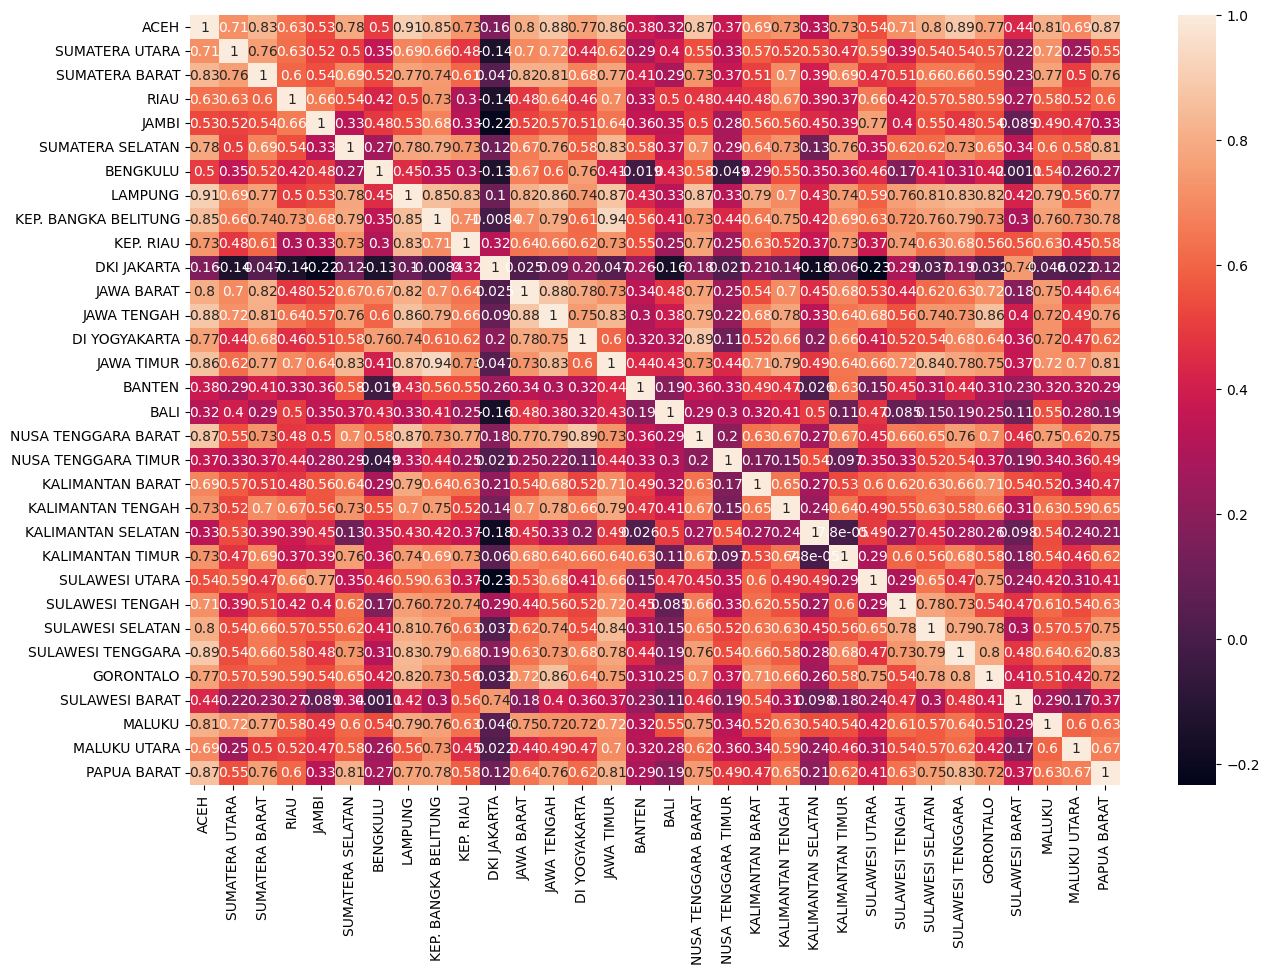

In [ ]:
# Visualisasi dengan heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

Hubungan linear cukup kuat dengan MALUKU adalah:
- ACEH
- LAMPUNG

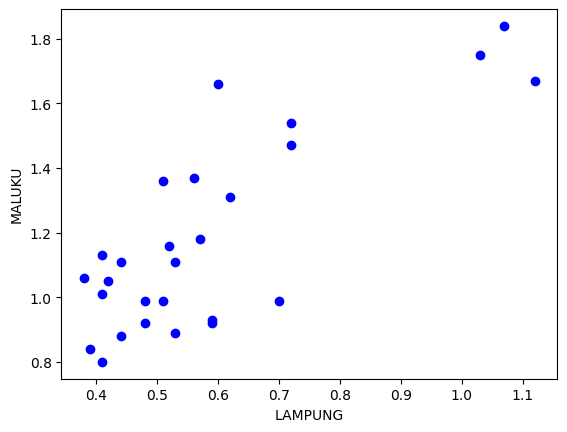

In [ ]:
# Melihat hasil scatter plot untuk lebih meyakinkan
plt.scatter(data['LAMPUNG'], data['MALUKU'], color='blue')
plt.xlabel("LAMPUNG")
plt.ylabel("MALUKU")
plt.show()

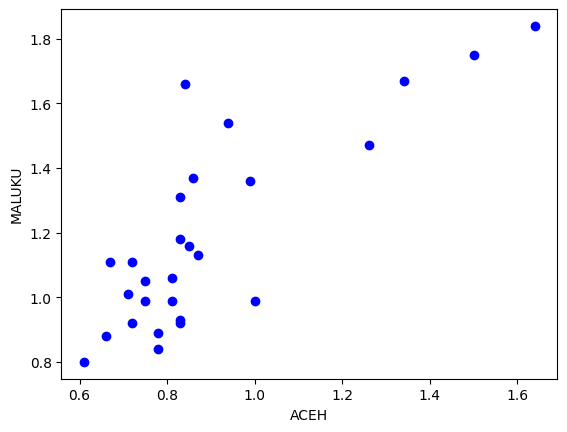

In [ ]:
# Tulis code di sini
plt.scatter(data['ACEH'], data['MALUKU'], color='blue')
plt.xlabel("ACEH")
plt.ylabel("MALUKU")
plt.show()

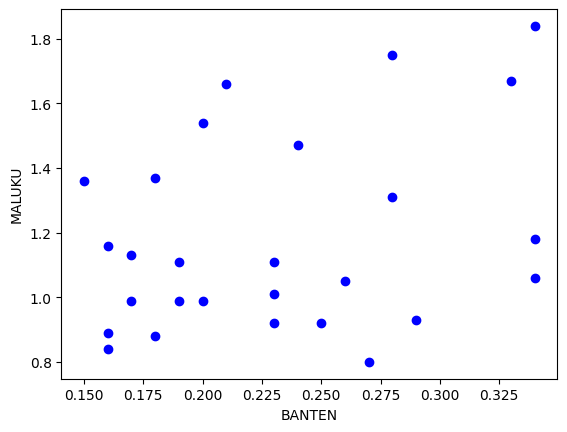

In [ ]:
# Tulis code di sini
plt.scatter(data['BANTEN'], data['MALUKU'], color='blue')
plt.xlabel("BANTEN")
plt.ylabel("MALUKU")
plt.show()

In [ ]:
# Splitting data menjadi data train dan test
features = ['ACEH', 'LAMPUNG']
X = data[features].values
Y = data.MALUKU

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=23)

In [ ]:
# Periksa bentuk data train dan test
print('Data Train : ', end='')
print(X_train.shape, Y_train.shape)
print('\nData Test : ', end='')
print(X_test.shape, Y_test.shape)

Data Train : (21, 2) (21,)

Data Test : (6, 2) (6,)


In [ ]:
# Membuat model regresi linear kemudian melatihnya menggunakan data train
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

<ipython-input-49-1997efa87eb5>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(err)


hasil uji Kolmogorov Smirnov 
 KstestResult(statistic=0.13673568712021023, pvalue=0.7783139507454798, statistic_location=0.0750963638219578, statistic_sign=1)


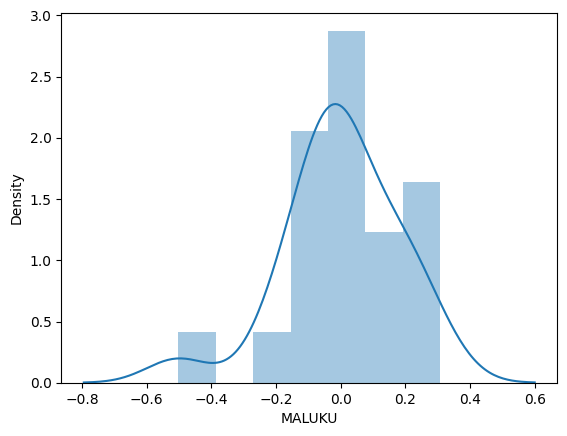

In [ ]:
# Uji normalitas
y_predtrain = lin_reg.predict(X_train)
err = y_predtrain - Y_train
sns.distplot(err)

z_er = stats.zscore(err)
norm_er = stats.kstest(z_er, 'norm',)
print('hasil uji Kolmogorov Smirnov \n', norm_er)



Plot histogram membentuk lonceng dan puncaknya cenderung ke tengah (mendukung bahwa errornya sudah berdistribusi normal)

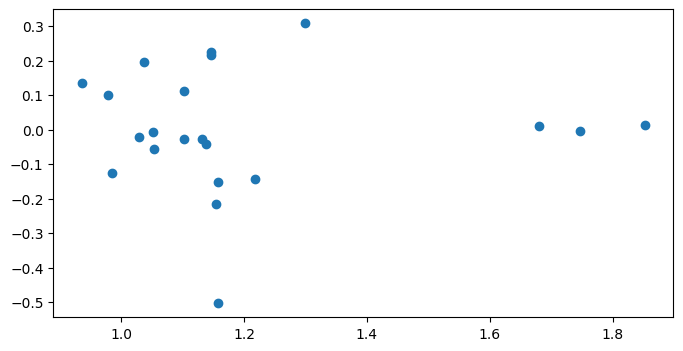

In [ ]:
# Tidak terjadi heteroskedastisitas
plt.figure(figsize = (8, 4))
plt.scatter(y_predtrain, err)
plt.show()

In [ ]:
# Tidak terjadi multikolinearitas (khusus untuk regresi ganda)
vif = [variance_inflation_factor(X_train, i) for i in range(len(X_train.T))]

pd.DataFrame({'VIF': vif[0:]}, index=features).T

,ACEH,LAMPUNG
VIF,49.311238,49.311238


In [ ]:
# Tidak terjadi autokorelasi
X_constant = sm.add_constant(X_train)
linreng = sm.OLS(Y_train, X_constant).fit()
linreng.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 MALUKU   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     17.88
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           5.28e-05
Time:                        03:11:27   Log-Likelihood:                 6.8791
No. Observations:                  21   AIC:                            -7.758
Df Residuals:                      18   BIC:                            -4.625
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3848      0.155      2.486      0.023       0.060       0.710
x1             0.6415      0.393      1.632      0.120      -0.184       1.467
x2             0.3890      0.478      0.813      0.427      -0.616       1.394
==============================================================================
Omnibus:                        5.636   Durbin-Watson:                   2.889
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                3.358
Skew:                           0.736   Prob(JB):                        0.187
Kurtosis:                       4.292   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# mengevaluasi model regresi linear menggunakan MSE, RMSE, dan MAE
y_predtest = lin_reg.predict(X_test)

# MSE
MSE_train = mean_squared_error(Y_train, y_predtrain)
print('Nilai MSE data training = ', MSE_train)
MSE_test = mean_squared_error(Y_test, y_predtest)
print('Nilai MSE data testing = ', MSE_test)

# RMSE
RMSE_train = np.sqrt(MSE_train)
print('Nilai RMSE data training = ', RMSE_train)
RMSE_test = np.sqrt(MSE_test)
print('Nilai RMSE data testing = ', RMSE_test)

# MAE
MAE_train = mean_absolute_error(Y_train, y_predtrain)
print('Nilai MAE data training = ', MAE_train)
MAE_test = mean_absolute_error(Y_test, y_predtest)
print('Nilai MAE data testing = ', MAE_test)

Nilai MSE data training =  0.030408582145739133
Nilai MSE data testing =  0.021914774438667923
Nilai RMSE data training =  0.1743805669956923
Nilai RMSE data testing =  0.1480363956554871
Nilai MAE data training =  0.12572129474450647
Nilai MAE data testing =  0.11049196460172138


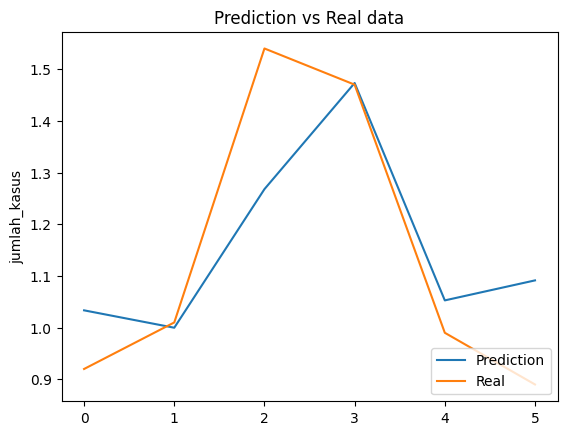

In [ ]:
# Vsualisasi prediksi
plt.plot(y_predtest)
plt.plot(Y_test.values)

plt.title('Prediction vs Real data')

plt.ylabel("jumlah_kasus")

plt.legend(labels = ['Prediction', "Real"], loc = 'lower right')

In [ ]:
# R2
print(f'R^2 score: {lin_reg.score(X, Y)}')

R^2 score: 0.6713206773492655


# Kesimpulan

In [ ]:
# Input data baru
ACEH = float(input('Input ACEH \t= '))
LAMPUNG = float(input('Input LAMPUNG \t= '))
data_baru = [[ACEH, LAMPUNG]]

# Prediksi data baru menggunakan model Regresi Linear
hasil_prediksi = lin_reg.predict(data_baru)
hasil_prediksi = float(hasil_prediksi)

# Cetak hasil prediksi (MALUKU)
print('\nPrediksi Maluku yang akan didapat adalah', hasil_prediksi)

Input ACEH 	= 0.70
Input LAMPUNG 	= 0.40

Prediksi Maluku yang akan didapat adalah 0.9894744024902399
